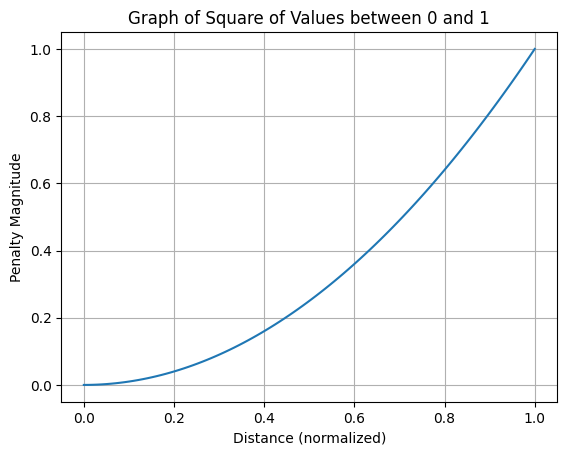

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate values between 0 and 1
x_values = np.linspace(0, 1, 100)

# Calculate the square of each value
y_values = x_values**2

# Plot the graph
plt.plot(x_values, y_values)
plt.title('Graph of Square of Values between 0 and 1')
plt.xlabel('Distance (normalized)')
plt.ylabel('Penalty Magnitude')
plt.grid(True)
plt.show()

In [11]:
import numpy as np

def _reward(info, observation):

    """
    *Reward = Lane_centering + Collision + Alive + Distance (NORMALIZED)
    """
    rewards = info['rewards'] #: {'lane_centering_reward': 0.13575132365757345, 'action_reward': False, 'collision_reward': True, 'on_road_reward': True}
    alive = 1.0
    lidar_detect = observation[1,0]
    relative_distance = [observation[1,1],observation[1,2]]

    if lidar_detect != 0:
        distance_reward = sum(coordinate**2 for coordinate in relative_distance)
        print("distance value", np.sqrt(distance_reward))
        distance_reward = 1-(np.sqrt(distance_reward)*2)

        # distance_reward = 1/np.sqrt(distance_reward)
    else:
        distance_reward = 0

    print("distance" ,distance_reward)

    if not rewards["on_road_reward"]:
        reward = -1.
    elif rewards["collision_reward"]:
        reward = -1. 
    else:
        reward = rewards["lane_centering_reward"] - (distance_reward)

    print("lane_centering" ,rewards["lane_centering_reward"])

    # config = {
    #     "collision_reward": -1.0,
    #     "lane_centering_reward" : 1.0,
    #     # "on_road_reward" : 0.1,
    #     "action_reward" : 0.1         
    #             }
    
    # reward_ = sum(rewards.get(name, 0) * reward for name, reward in config.items())


    # reward = reward_ - (0.3* distance_reward)
    # reward = (reward+1)/2

    return reward

In [7]:
import gymnasium as gym
import numpy as np
import pprint
from utils import load_config

data = load_config()
env = gym.make('racetrack-v0', render_mode = 'rgb_array')
env.configure(data) # type: ignore
pprint.pprint(env.config) # type: ignore

(obs, info), done = env.reset(), False
print(obs)


{'action': {'lateral': True,
            'longitudinal': False,
            'target_speeds': [0, 5, 10],
            'type': 'ContinuousAction'},
 'action_reward': 0.1,
 'centering_position': [0.5, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 100,
 'lane_centering_cost': 4,
 'lane_centering_reward': 1,
 'manual_control': False,
 'observation': {'features': ['presence',
                              'x',
                              'y',
                              'vx',
                              'vy',
                              'cos_h',
                              'sin_h',
                              'heading',
                              'long_off',
                              'lat_off',
                              'ang_off'],
                 'features_range': {'vx': [-20, 20],
                                    'vy': [-20, 20],
                                    'x': [-100, 100],
                                    'y': [-100, 100]},
 

/home/o/Documents/thesis/.venv/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/home/o/Documents/thesis/.venv/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


In [12]:
rew = _reward(info,obs)
print(rew)

distance value 0.12384744493826552
distance 0.752305110123469
lane_centering 1.0
0.247694889876531


In [6]:
a=np.sqrt((-6.1045047e-02)**2 + (-9.6441088e-03)**2)
print(a**2)

0.0038195065977784464


In [37]:
 
a=np.sqrt((-5.01582772e-02)**2 + (-1.24055175e-02)**2)
# print((1/(a**2))*-0.001)
print(a)
print(0.3*(1-a))

a=np.sqrt((-5.6496590e-02)**2 + ( -3.4651257e-02)**2)
# print((1/(a**2))*-0.001)
print(a)
print(0.3*(1-a))

a=np.sqrt((9.6272838e-01)**2 + (-2.7047002e-01)**2)
# print((1/(a**2))*-0.001)
print(a)
print(1-a**2)

 


0.05166962005003371
0.2844991139849899
0.06627649880091847
0.28011705035972445
0.9999999826881123
3.462377506924241e-08
